In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mdhamani/goodreads-books-100k")

print("Path to dataset files:", path)

/Users/lilswapnil/Github/book-recommender/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/lilswapnil/.cache/kagglehub/datasets/mdhamani/goodreads-books-100k/versions/1


In [2]:
import pandas as pd

In [3]:
books = pd.read_csv(f"{path}/GoodReads_100k_books.csv")
books.shape

(100000, 13)

In [4]:
books.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


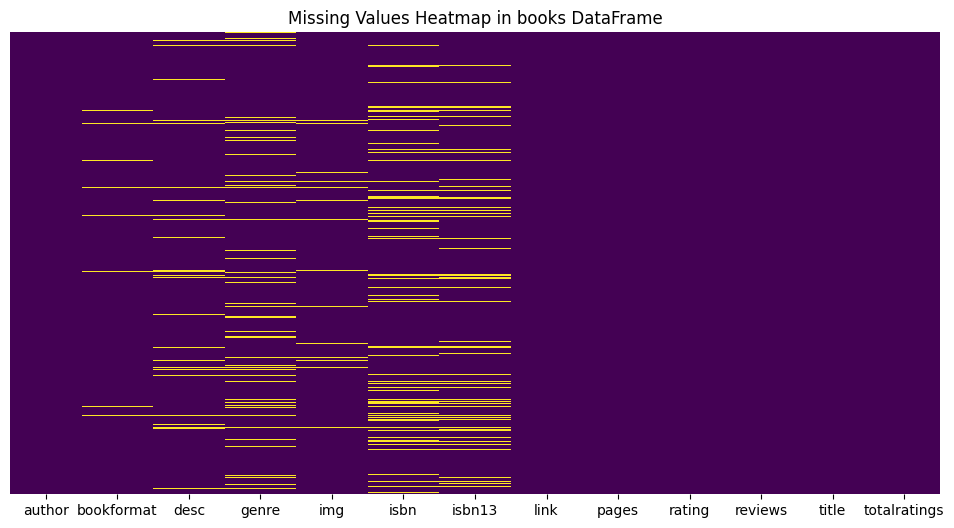

In [5]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(books.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap in books DataFrame')
plt.show()

In [6]:
missing_description_count = books['desc'].isnull().sum()
print(f"Number of books with missing descriptions: {missing_description_count}")

books[books['desc'].isnull()]

Number of books with missing descriptions: 6772


,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
30,Luc Milne,Paperback,NaN,"Erotica,Gay Erotica",https://i.gr-assets.com/images/S/compressed.ph...,943595614,9.78E+12,https://goodreads.com/book/show/1001377.The_Mi...,160,3.46,1,The Milk Farm: An Erotic Novel,13
36,Wilford C. Wood,Hardcover,NaN,NaN,NaN,NaN,NaN,https://goodreads.com/book/show/10014243-josep...,610,4.29,2,Joseph Smith Begins His Work Book of Mormon 18...,7
37,"Ovid,David Malouf,James Michie",Paperback,NaN,"Poetry,Classics,Nonfiction,Philosophy,Romance,...",https://i.gr-assets.com/images/S/compressed.ph...,375761179,9.78E+12,https://goodreads.com/book/show/100142.The_Art...,199,3.81,349,The Art of Love,5154
38,Ronald Jackson II,ebook,NaN,NaN,https://i.gr-assets.com/images/S/compressed.ph...,791482375,9.78E+12,https://goodreads.com/book/show/10014315-scrip...,0,4.14,1,"Scripting the Black Masculine Body: Identity, ...",7
39,Richard Allen,Paperback,NaN,NaN,https://i.gr-assets.com/images/S/compressed.ph...,915992582,9.78E+12,https://goodreads.com/book/show/1001432.A_Narr...,0,4.50,2,A Narrative of the Proceedings of the Black Pe...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99964,Eryl Thomas,Paperback,NaN,NaN,NaN,NaN,NaN,https://goodreads.com/book/show/17318982-lland...,24,5.00,0,llandaff Cathedral,1
99965,Pitkin Guides,Paperback,NaN,NaN,NaN,NaN,NaN,https://goodreads.com/book/show/17318988-the-b...,24,4.50,0,The battle of hastings and the norman conquest,2
99967,st helens church,Paperback,NaN,NaN,NaN,NaN,NaN,https://goodreads.com/book/show/17318995-st-he...,28,3.50,0,st helens church,2
99972,st mary Chepstow,NaN,NaN,NaN,NaN,NaN,NaN,https://goodreads.com/book/show/17319016-the-p...,14,5.00,0,the priory and parish church of st mary Chepstow,1


In [7]:
#drop the records with no isbn or title or author or pages or desc
books = books.dropna(subset=['isbn', 'title', 'author', 'pages', 'desc'])

In [8]:
books.shape

(80796, 13)

In [9]:
books = books.dropna(subset=['desc', 'title', 'genre'])

In [10]:
books.shape

(74141, 13)

In [11]:
books.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
5,Jeffrey Pfeffer,Hardcover,Why is common sense so uncommon when it comes ...,"Business,Leadership,Romance,Historical Romance...",https://i.gr-assets.com/images/S/compressed.ph...,875848419,9.78E+12,https://goodreads.com/book/show/1001090.The_Hu...,368,3.73,7,The Human Equation: Building Profits by Puttin...,119


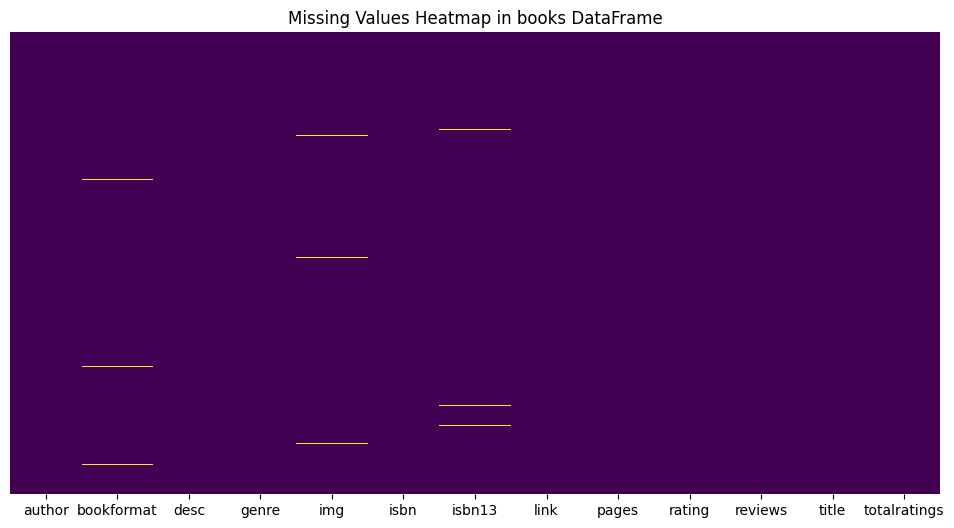

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(books.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap in books DataFrame')
plt.show()

In [13]:
books['bookformat'] = books['bookformat'].fillna('Unknown')
books['img'] = books['img'].fillna('No Image')

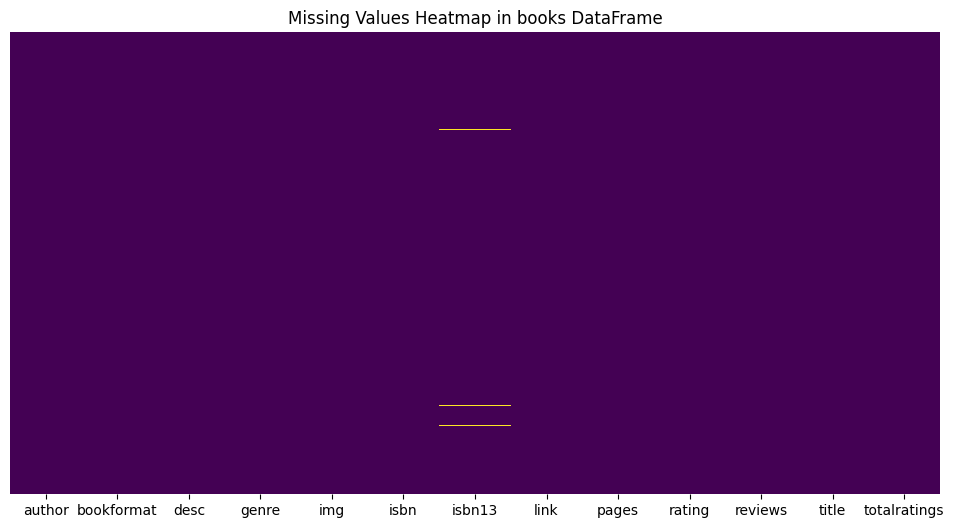

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(books.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap in books DataFrame')
plt.show()

In [15]:
books_no_isbn13 = books[books['isbn13'].isnull()]
books_no_isbn13.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
507,"Lin Carter,Vincent Di Fate",Mass Market Paperback,Librarian note: Dell 4182 95Â¢ on the front co...,"Fantasy,Science Fiction,Science Fiction,Sword ...",https://i.gr-assets.com/images/S/compressed.ph...,440041821,NaN,https://goodreads.com/book/show/1005186.Jandar...,224,3.57,18,Jandar of Callisto,221
544,Chad Hensley,Hardcover,ESOTERRA was an underground magazine focusing ...,"Cultural,Counter Culture,Nonfiction,Art",https://i.gr-assets.com/images/S/compressed.ph...,1840681748,NaN,https://goodreads.com/book/show/10054832-esote...,320,3.86,1,Esoterra - The Journal of Extreme Culture,28
641,Danny Vendramini,Paperback,Put aside everything you thought you knew abou...,Nonfiction,https://i.gr-assets.com/images/S/compressed.ph...,9780908244,NaN,https://goodreads.com/book/show/10062419-them-us,313,3.95,11,Them+Us,38
824,Richard Nelson,Paperback,Book by Richard Nelson. Lyrics by Tim Rice. Mu...,"Music,Musicals,Fiction,Drama",No Image,573689176,NaN,https://goodreads.com/book/show/10076573-chess,0,3.64,3,Chess,25
1583,Miloslav Å vandrlÃ­k,Paperback,Dnes jiÅ¾ klasickÃ½ titul pÅ™ipomÃ­najÃ­cÃ­ do...,"European Literature,Czech Literature,Humor,Fic...",https://i.gr-assets.com/images/S/compressed.ph...,8020401601,NaN,https://goodreads.com/book/show/10114312-ern-b...,384,4.10,12,ÄŒernÃ­ baroni,279


In [22]:
books_with_no_isbn13 = books[books['isbn13'].isnull()]
books_with_no_isbn13.head(13)

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
507,"Lin Carter,Vincent Di Fate",Mass Market Paperback,Librarian note: Dell 4182 95Â¢ on the front co...,"Fantasy,Science Fiction,Science Fiction,Sword ...",https://i.gr-assets.com/images/S/compressed.ph...,440041821,NaN,https://goodreads.com/book/show/1005186.Jandar...,224,3.57,18,Jandar of Callisto,221
544,Chad Hensley,Hardcover,ESOTERRA was an underground magazine focusing ...,"Cultural,Counter Culture,Nonfiction,Art",https://i.gr-assets.com/images/S/compressed.ph...,1840681748,NaN,https://goodreads.com/book/show/10054832-esote...,320,3.86,1,Esoterra - The Journal of Extreme Culture,28
641,Danny Vendramini,Paperback,Put aside everything you thought you knew abou...,Nonfiction,https://i.gr-assets.com/images/S/compressed.ph...,9780908244,NaN,https://goodreads.com/book/show/10062419-them-us,313,3.95,11,Them+Us,38
824,Richard Nelson,Paperback,Book by Richard Nelson. Lyrics by Tim Rice. Mu...,"Music,Musicals,Fiction,Drama",No Image,573689176,NaN,https://goodreads.com/book/show/10076573-chess,0,3.64,3,Chess,25
1583,Miloslav Å vandrlÃ­k,Paperback,Dnes jiÅ¾ klasickÃ½ titul pÅ™ipomÃ­najÃ­cÃ­ do...,"European Literature,Czech Literature,Humor,Fic...",https://i.gr-assets.com/images/S/compressed.ph...,8020401601,NaN,https://goodreads.com/book/show/10114312-ern-b...,384,4.10,12,ÄŒernÃ­ baroni,279
1654,Gozo Shioda,Paperback,"Aikido Shugyo, by Gozo Shioda, was originally ...","Combat,Martial Arts",https://i.gr-assets.com/images/S/compressed.ph...,968779123,NaN,https://goodreads.com/book/show/10118954-aikid...,207,4.65,5,Aikido Shugyo,31
1810,"Arthur Cotterell,Ø³Ù‡Ù‰ Ø§Ù„Ø·Ø±ÙŠØ­ÙŠ",Paperback,"Ø£ØµÙ„ Ø§Ù„Ø£Ø³Ø·ÙˆØ±Ø©:,Ø¥Ù† Ø§Ù„Ø§Ù‡ØªÙ…Ø§Ù…...","Reference,Nonfiction,Fantasy,Mythology,History...",https://i.gr-assets.com/images/S/compressed.ph...,9789334074,NaN,https://goodreads.com/book/show/10127910,256,3.73,6,Ù‚Ø§Ù…ÙˆØ³ Ø£Ø³Ø§Ø·ÙŠØ± Ø§Ù„Ø¹Ø§Ù„Ù…,89
1948,Leena Lehtolainen,Hardcover,MikÃ¤ sai Maria Kallion ryhtymÃ¤Ã¤n poliisiksi...,"European Literature,Finnish Literature,Mystery...",https://i.gr-assets.com/images/S/compressed.ph...,9513121585,NaN,https://goodreads.com/book/show/10136255-sukka...,404,3.08,1,SukkanauhatyttÃ¶ ja muita kertomuksia,106
2072,Vladislav VanÄura,Unknown,KlasickÃ© dÃ­lo ÄeskÃ© literatury. BanÃ¡lnÃ­ ...,"European Literature,Czech Literature,Classics,...",https://i.gr-assets.com/images/S/compressed.ph...,9788024614,NaN,https://goodreads.com/book/show/10145158-rozma...,162,3.29,60,RozmarnÃ© lÃ©to,1035
2349,Matthew Kelly,Paperback,At a time when many Catholics are disillusione...,"Christianity,Catholic,Religion,Nonfiction,Reli...",https://i.gr-assets.com/images/S/compressed.ph...,984131892,NaN,https://goodreads.com/book/show/10160346-redis...,317,4.18,547,Rediscover Catholicism,4790


In [25]:
# Convert ISBN to ISBN-13 for records missing ISBN-13
def convert_isbn_to_isbn13(isbn):
    """
    Convert a 10-digit ISBN to 13-digit ISBN.
    If already 13 digits or invalid, return as is.
    """
    isbn = str(isbn).replace('-', '').replace(' ', '')
    if len(isbn) == 10:
        prefix = '978'
        core = isbn[:-1]
        isbn13_body = prefix + core
        # Ensure all characters are digits before calculating check digit
        if not isbn13_body.isdigit():
            return None
        total = 0
        for i, digit in enumerate(isbn13_body):
            total += int(digit) * (1 if i % 2 == 0 else 3)
        check_digit = (10 - (total % 10)) % 10
        return isbn13_body + str(check_digit)
    elif len(isbn) == 13 and isbn.isdigit():
        return isbn
    else:
        return None

# Apply conversion to records missing ISBN-13
books_with_no_isbn13['isbn13'] = books_with_no_isbn13['isbn'].apply(convert_isbn_to_isbn13)
books_with_no_isbn13.head()

/var/folders/23/9861x19n6cj07_1zkxf3814w0000gn/T/ipykernel_62110/673515638.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_with_no_isbn13['isbn13'] = books_with_no_isbn13['isbn'].apply(convert_isbn_to_isbn13)


,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
507,"Lin Carter,Vincent Di Fate",Mass Market Paperback,Librarian note: Dell 4182 95Â¢ on the front co...,"Fantasy,Science Fiction,Science Fiction,Sword ...",https://i.gr-assets.com/images/S/compressed.ph...,440041821,None,https://goodreads.com/book/show/1005186.Jandar...,224,3.57,18,Jandar of Callisto,221
544,Chad Hensley,Hardcover,ESOTERRA was an underground magazine focusing ...,"Cultural,Counter Culture,Nonfiction,Art",https://i.gr-assets.com/images/S/compressed.ph...,1840681748,9781840681741,https://goodreads.com/book/show/10054832-esote...,320,3.86,1,Esoterra - The Journal of Extreme Culture,28
641,Danny Vendramini,Paperback,Put aside everything you thought you knew abou...,Nonfiction,https://i.gr-assets.com/images/S/compressed.ph...,9780908244,9789780908249,https://goodreads.com/book/show/10062419-them-us,313,3.95,11,Them+Us,38
824,Richard Nelson,Paperback,Book by Richard Nelson. Lyrics by Tim Rice. Mu...,"Music,Musicals,Fiction,Drama",No Image,573689176,None,https://goodreads.com/book/show/10076573-chess,0,3.64,3,Chess,25
1583,Miloslav Å vandrlÃ­k,Paperback,Dnes jiÅ¾ klasickÃ½ titul pÅ™ipomÃ­najÃ­cÃ­ do...,"European Literature,Czech Literature,Humor,Fic...",https://i.gr-assets.com/images/S/compressed.ph...,8020401601,9788020401601,https://goodreads.com/book/show/10114312-ern-b...,384,4.10,12,ÄŒernÃ­ baroni,279


In [ ]:
books[books['isbn13'].isnull()]